# Emotion Classification - Exploratory Data Analysis (EDA)

This notebook performs comprehensive exploratory data analysis on the emotion classification dataset.

**Dataset Overview:**
- 6 emotion classes: anger, disgust, fear, sadness, surprise, joy
- Text posts from various sources
- Training and testing splits provided

## 1. Import Libraries

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Data

In [2]:
# Load JSON data
with open('Phase3_Dataset/final_posts.json', 'r', encoding='utf-8') as f:
    posts_data = json.load(f)

# Extract posts into a DataFrame
posts_list = []
for item in posts_data:
    post = item['root']['_source']['post']
    posts_list.append({
        'id': post['post_id'],
        'text': post['text'],
        'hashtags': post['hashtags']
    })

df_posts = pd.DataFrame(posts_list)
print(f"Loaded {len(df_posts)} posts")

# Load emotion labels
df_emotion = pd.read_csv('Phase3_Dataset/emotion.csv')
print(f"Loaded {len(df_emotion)} emotion labels")

# Load data identification (train/test split)
df_split = pd.read_csv('Phase3_Dataset/data_identification.csv')
print(f"Loaded {len(df_split)} split identifications")

# Display basic info
print(f"\nTotal posts: {len(df_posts)}")
print(f"Total labeled: {len(df_emotion)}")
print(f"Total in split file: {len(df_split)}")

Loaded 64171 posts
Loaded 47890 emotion labels
Loaded 64171 split identifications

Total posts: 64171
Total labeled: 47890
Total in split file: 64171


## 3. Merge Datasets

In [3]:
# Merge all data
df = df_posts.merge(df_split, on='id', how='left')
df = df.merge(df_emotion, on='id', how='left')

print(f"Merged dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head()

Merged dataset shape: (64171, 5)

Columns: ['id', 'text', 'hashtags', 'split', 'emotion']

First few rows:


,id,text,hashtags,split,emotion
0,0x61fc95,"We got the ranch, loaded our guns and sat up t...",[],test,NaN
1,0x35663e,I bet there is an army of married couples who ...,[],train,joy
2,0xc78afe,This could only end badly.,[],train,fear
3,0x90089c,My sister squeezed a lime in her milk when she...,[],train,joy
4,0xaba820,and that got my head bobbing a little bit.,[],test,NaN


## 4. Data Quality Check

In [4]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())
print(f"\nMissing rate:")
print(df.isnull().sum() / len(df) * 100)

# Check data types
print(f"\nData types:")
print(df.dtypes)

# Check for duplicates
print(f"\nDuplicate IDs: {df['id'].duplicated().sum()}")
print(f"Duplicate texts: {df['text'].duplicated().sum()}")

Missing values:
id              0
text            0
hashtags        0
split           0
emotion     16281
dtype: int64

Missing rate:
id           0.000000
text         0.000000
hashtags     0.000000
split        0.000000
emotion     25.371274
dtype: float64

Data types:
id          object
text        object
hashtags    object
split       object
emotion     object
dtype: object

Duplicate IDs: 0
Duplicate texts: 0


## 5. Train/Test Split Analysis

Train/Test Split:
split
train    47890
test     16281
Name: count, dtype: int64

Percentage:
split
train    74.628726
test     25.371274
Name: proportion, dtype: float64


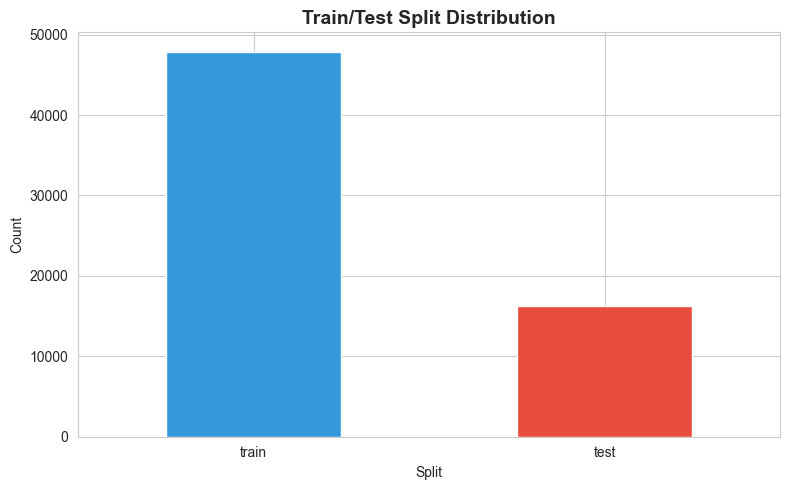


Training set: 47890 samples
Test set: 16281 samples

Test set has labels: 0 (should be 0)

Test set has labels: 0 (should be 0)


In [5]:
# Split distribution
print("Train/Test Split:")
print(df['split'].value_counts())
print(f"\nPercentage:")
print(df['split'].value_counts(normalize=True) * 100)

# Visualize split
plt.figure(figsize=(8, 5))
df['split'].value_counts().plot(kind='bar', color=['#3498db', '#e74c3c'])
plt.title('Train/Test Split Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Split')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Create train and test dataframes
df_train = df[df['split'] == 'train'].copy()
df_test = df[df['split'] == 'test'].copy()

print(f"\nTraining set: {len(df_train)} samples")
print(f"Test set: {len(df_test)} samples")
print(f"\nTest set has labels: {df_test['emotion'].notna().sum()} (should be 0)")

## 6. Emotion Distribution Analysis

Emotion Distribution in Training Set:
emotion
joy         23797
anger       10694
surprise     6281
sadness      3926
fear         2009
disgust      1183
Name: count, dtype: int64

Percentage:
emotion
joy         49.690958
anger       22.330340
surprise    13.115473
sadness      8.197954
fear         4.195030
disgust      2.470244
Name: proportion, dtype: float64
emotion
joy         23797
anger       10694
surprise     6281
sadness      3926
fear         2009
disgust      1183
Name: count, dtype: int64

Percentage:
emotion
joy         49.690958
anger       22.330340
surprise    13.115473
sadness      8.197954
fear         4.195030
disgust      2.470244
Name: proportion, dtype: float64


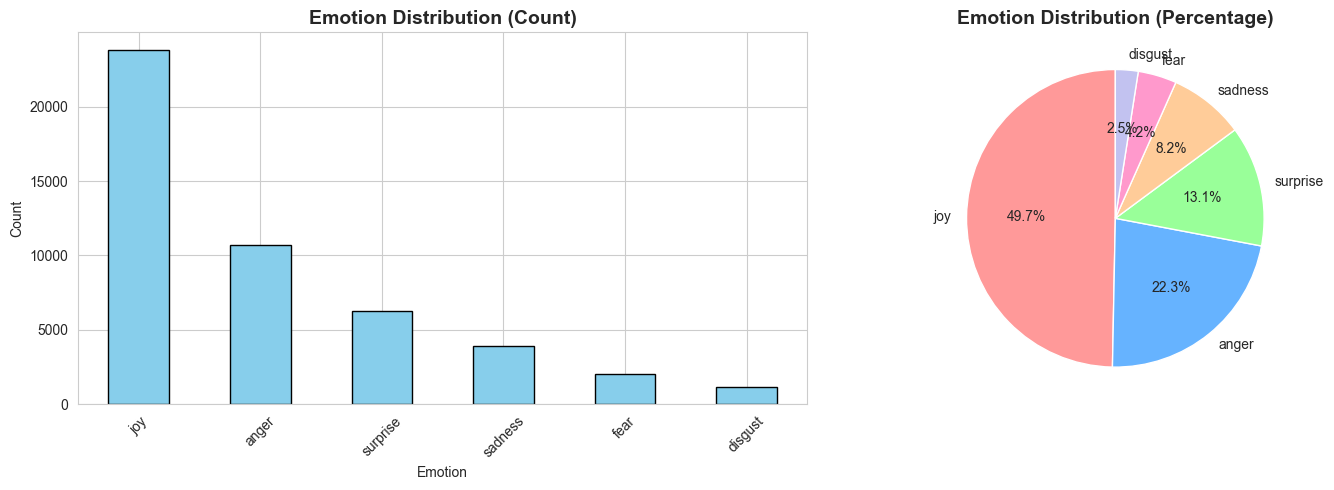


Class Imbalance Ratio:
Max/Min ratio: 20.12


In [6]:
# Emotion distribution in training data
print("Emotion Distribution in Training Set:")
emotion_counts = df_train['emotion'].value_counts()
print(emotion_counts)
print(f"\nPercentage:")
print(df_train['emotion'].value_counts(normalize=True) * 100)

# Visualize emotion distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot
emotion_counts.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Emotion Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Emotion')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc', '#c2c2f0']
emotion_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Emotion Distribution (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

# Check for class imbalance
print(f"\nClass Imbalance Ratio:")
max_count = emotion_counts.max()
min_count = emotion_counts.min()
print(f"Max/Min ratio: {max_count/min_count:.2f}")

## 7. Text Length Analysis

Text Length Statistics:
count    47890.000000
mean        75.240405
std         41.664515
min          2.000000
25%         43.000000
50%         72.000000
75%        104.000000
max        703.000000
Name: text_length, dtype: float64

Word Count Statistics:
count    47890.000000
mean        13.857569
std          7.395836
min          1.000000
25%          8.000000
50%         13.000000
75%         19.000000
max         89.000000
Name: word_count, dtype: float64
count    47890.000000
mean        75.240405
std         41.664515
min          2.000000
25%         43.000000
50%         72.000000
75%        104.000000
max        703.000000
Name: text_length, dtype: float64

Word Count Statistics:
count    47890.000000
mean        13.857569
std          7.395836
min          1.000000
25%          8.000000
50%         13.000000
75%         19.000000
max         89.000000
Name: word_count, dtype: float64


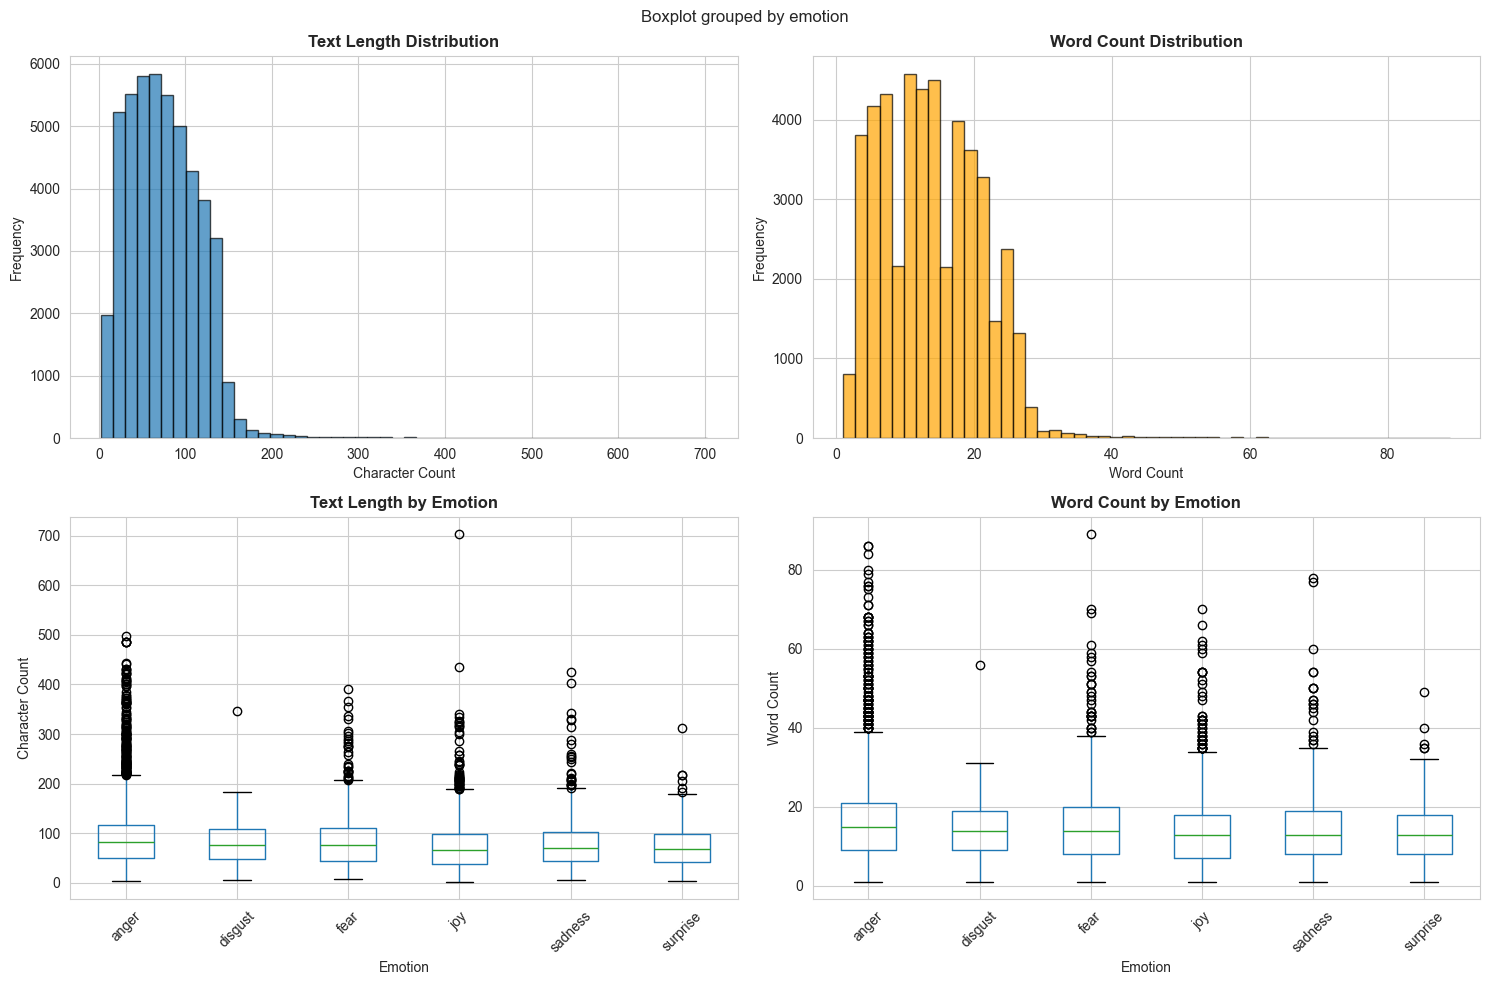


Average Text Length by Emotion:
emotion
anger       85.867402
fear        80.705824
disgust     79.010144
sadness     75.493887
surprise    71.890145
joy         70.658444
Name: text_length, dtype: float64

Average Word Count by Emotion:
emotion
anger       15.326351
fear        14.963166
disgust     14.081995
sadness     14.074376
surprise    13.487980
joy         13.154809
Name: word_count, dtype: float64


In [7]:
# Calculate text statistics
df_train['text_length'] = df_train['text'].str.len()
df_train['word_count'] = df_train['text'].str.split().str.len()

print("Text Length Statistics:")
print(df_train['text_length'].describe())
print(f"\nWord Count Statistics:")
print(df_train['word_count'].describe())

# Visualize text length distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Overall text length distribution
axes[0, 0].hist(df_train['text_length'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Text Length Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Character Count')
axes[0, 0].set_ylabel('Frequency')

# Overall word count distribution
axes[0, 1].hist(df_train['word_count'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Word Count Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Word Count')
axes[0, 1].set_ylabel('Frequency')

# Text length by emotion
df_train.boxplot(column='text_length', by='emotion', ax=axes[1, 0])
axes[1, 0].set_title('Text Length by Emotion', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Emotion')
axes[1, 0].set_ylabel('Character Count')
plt.sca(axes[1, 0])
plt.xticks(rotation=45)

# Word count by emotion
df_train.boxplot(column='word_count', by='emotion', ax=axes[1, 1])
axes[1, 1].set_title('Word Count by Emotion', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Emotion')
axes[1, 1].set_ylabel('Word Count')
plt.sca(axes[1, 1])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Average statistics by emotion
print("\nAverage Text Length by Emotion:")
print(df_train.groupby('emotion')['text_length'].mean().sort_values(ascending=False))
print("\nAverage Word Count by Emotion:")
print(df_train.groupby('emotion')['word_count'].mean().sort_values(ascending=False))

## 8. Hashtag Analysis

Hashtag Usage:
Posts with hashtags: 2508 (5.24%)
Posts without hashtags: 45382 (94.76%)

Hashtag Count Statistics:
count    47890.000000
mean         0.123846
std          0.687461
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         14.000000
Name: hashtag_count, dtype: float64


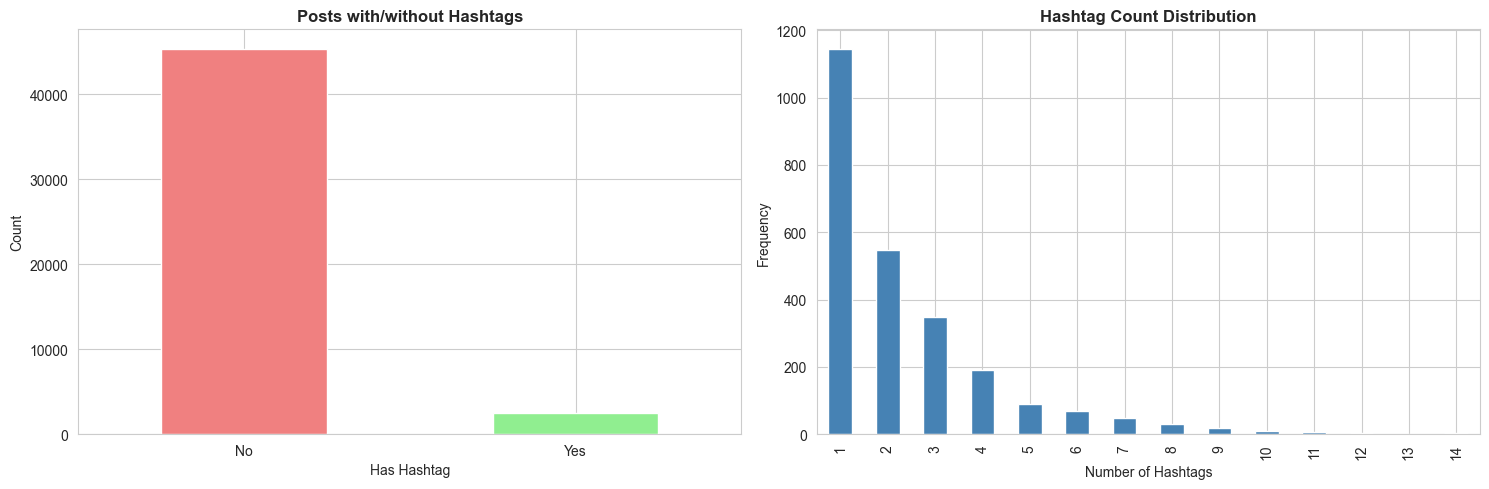


Top 20 Hashtags:
  happy: 55
  sad: 48
  fear: 47
  smile: 46
  anxiety: 45
  depression: 43
  terrorism: 41
  blues: 40
  awful: 40
  nightmare: 38
  bitter: 37
  musically: 37
  terrible: 36
  optimism: 36
  fuming: 35
  sadness: 35
  angry: 34
  gbbo: 33
  hilarious: 33
  nervous: 33


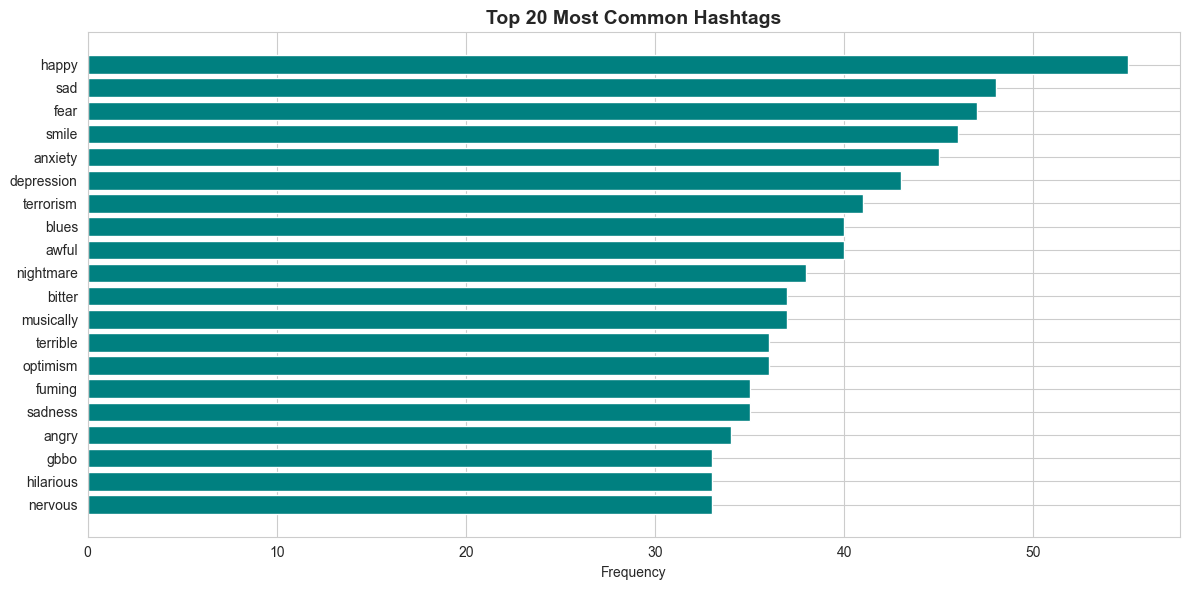

In [8]:
# Hashtag usage
df_train['hashtag_count'] = df_train['hashtags'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df_train['has_hashtag'] = df_train['hashtag_count'] > 0

print("Hashtag Usage:")
print(f"Posts with hashtags: {df_train['has_hashtag'].sum()} ({df_train['has_hashtag'].sum()/len(df_train)*100:.2f}%)")
print(f"Posts without hashtags: {(~df_train['has_hashtag']).sum()} ({(~df_train['has_hashtag']).sum()/len(df_train)*100:.2f}%)")

print(f"\nHashtag Count Statistics:")
print(df_train['hashtag_count'].describe())

# Visualize hashtag usage
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Hashtag presence
df_train['has_hashtag'].value_counts().plot(kind='bar', ax=axes[0], color=['lightcoral', 'lightgreen'])
axes[0].set_title('Posts with/without Hashtags', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Has Hashtag')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['No', 'Yes'], rotation=0)

# Hashtag count distribution (for posts with hashtags)
df_with_hashtags = df_train[df_train['has_hashtag']]
if len(df_with_hashtags) > 0:
    df_with_hashtags['hashtag_count'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='steelblue')
    axes[1].set_title('Hashtag Count Distribution', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Number of Hashtags')
    axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Top hashtags
all_hashtags = []
for hashtags in df_train['hashtags']:
    if isinstance(hashtags, list):
        all_hashtags.extend(hashtags)

if all_hashtags:
    hashtag_counter = Counter(all_hashtags)
    top_hashtags = hashtag_counter.most_common(20)
    print(f"\nTop 20 Hashtags:")
    for tag, count in top_hashtags:
        print(f"  {tag}: {count}")
    
    # Visualize top hashtags
    if top_hashtags:
        tags, counts = zip(*top_hashtags)
        plt.figure(figsize=(12, 6))
        plt.barh(range(len(tags)), counts, color='teal')
        plt.yticks(range(len(tags)), tags)
        plt.xlabel('Frequency')
        plt.title('Top 20 Most Common Hashtags', fontsize=14, fontweight='bold')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
else:
    print("\nNo hashtags found in the dataset.")

## 9. Sample Text Examples by Emotion

In [9]:
# Display sample texts for each emotion
print("Sample Texts by Emotion:\n")
print("="*50)

for emotion in df_train['emotion'].unique():
    print(f"\n{emotion.upper()}:")
    print("-"*50)
    samples = df_train[df_train['emotion'] == emotion]['text'].sample(min(3, len(df_train[df_train['emotion'] == emotion]))).values
    for i, sample in enumerate(samples, 1):
        print(f"{i}. {sample}")
    print()

Sample Texts by Emotion:


JOY:
--------------------------------------------------
1. If people don't act the way I want it is because they have bad reasons. Lol
2. He will rest easy knowing how happy he made all of us
3. Google gold's formula. It's what NRcan recommends. Few whitepapers will come up as well, if more in-depth research is your thing.


FEAR:
--------------------------------------------------
1. Let's refuse to live in #fear -  #c$%t
2. Have you tried taunting for 90 seconds straight?
3. @X_KIMTAEHYUNG_X \n— momentarily before it disappeared, only solemnity and anxiety lacing his features. \n\n'I ran out to get you before —


ANGER:
--------------------------------------------------
1. Nothing worse than an uber driver that can't drive. #awful
2. I feel like you should, in commemoration.
3. It was clearly them who threw supplies everywhere and even hit our “Big White” volunteers, yet they demanded a 200 yuan subsidy per person, sounding all self-righteous.


SURPRISE:
--

## 10. Basic Text Preprocessing Analysis

Text Characteristics:
Posts with URLs: 1 (0.00%)
Posts with mentions (@): 2410 (5.03%)
Posts with numbers: 4941 (10.32%)
Posts with special chars: 44062 (92.01%)
Posts with URLs: 1 (0.00%)
Posts with mentions (@): 2410 (5.03%)
Posts with numbers: 4941 (10.32%)
Posts with special chars: 44062 (92.01%)


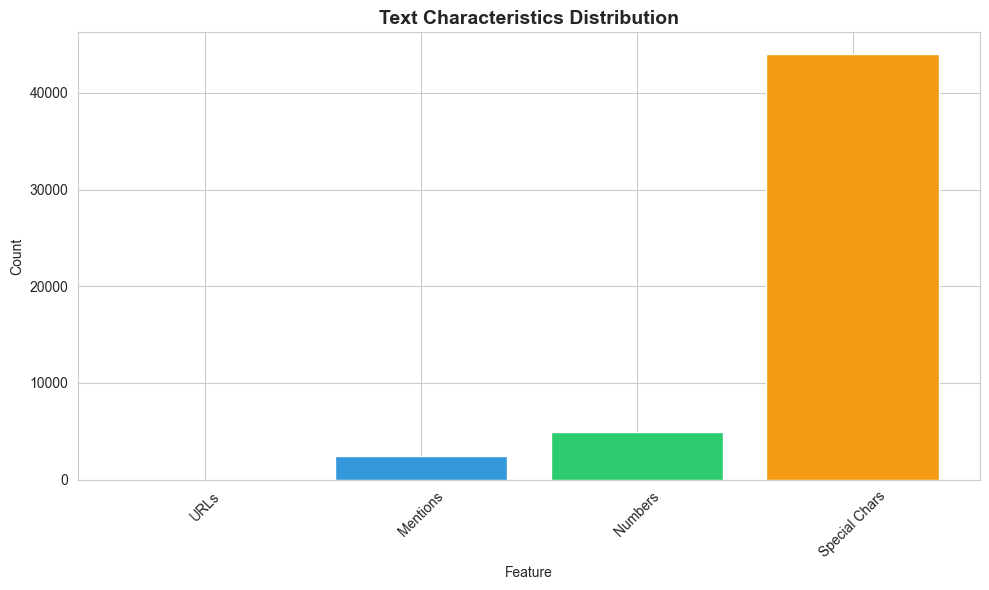

In [10]:
import re

# Check for special characters and patterns
df_train['has_url'] = df_train['text'].str.contains(r'http[s]?://|www\.', case=False, regex=True)
df_train['has_mention'] = df_train['text'].str.contains(r'@\w+', regex=True)
df_train['has_number'] = df_train['text'].str.contains(r'\d', regex=True)
df_train['has_special_chars'] = df_train['text'].str.contains(r'[^a-zA-Z0-9\s]', regex=True)

print("Text Characteristics:")
print(f"Posts with URLs: {df_train['has_url'].sum()} ({df_train['has_url'].sum()/len(df_train)*100:.2f}%)")
print(f"Posts with mentions (@): {df_train['has_mention'].sum()} ({df_train['has_mention'].sum()/len(df_train)*100:.2f}%)")
print(f"Posts with numbers: {df_train['has_number'].sum()} ({df_train['has_number'].sum()/len(df_train)*100:.2f}%)")
print(f"Posts with special chars: {df_train['has_special_chars'].sum()} ({df_train['has_special_chars'].sum()/len(df_train)*100:.2f}%)")

# Visualize
features = ['has_url', 'has_mention', 'has_number', 'has_special_chars']
feature_names = ['URLs', 'Mentions', 'Numbers', 'Special Chars']
counts = [df_train[f].sum() for f in features]

plt.figure(figsize=(10, 6))
plt.bar(feature_names, counts, color=['#e74c3c', '#3498db', '#2ecc71', '#f39c12'])
plt.title('Text Characteristics Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 11. Word Frequency Analysis

Top 30 Most Common Words:
  the: 20842
  i: 18629
  to: 14655
  a: 14251
  and: 11121
  you: 9350
  is: 9207
  of: 8369
  that: 7662
  it: 6981
  in: 6853
  for: 6434
  this: 6269
  my: 5717
  [name]: 5097
  was: 4425
  but: 4201
  be: 3962
  not: 3960
  on: 3929
  so: 3896
  just: 3870
  with: 3701
  have: 3665
  are: 3523
  like: 3517
  your: 2986
  they: 2885
  me: 2787
  if: 2715


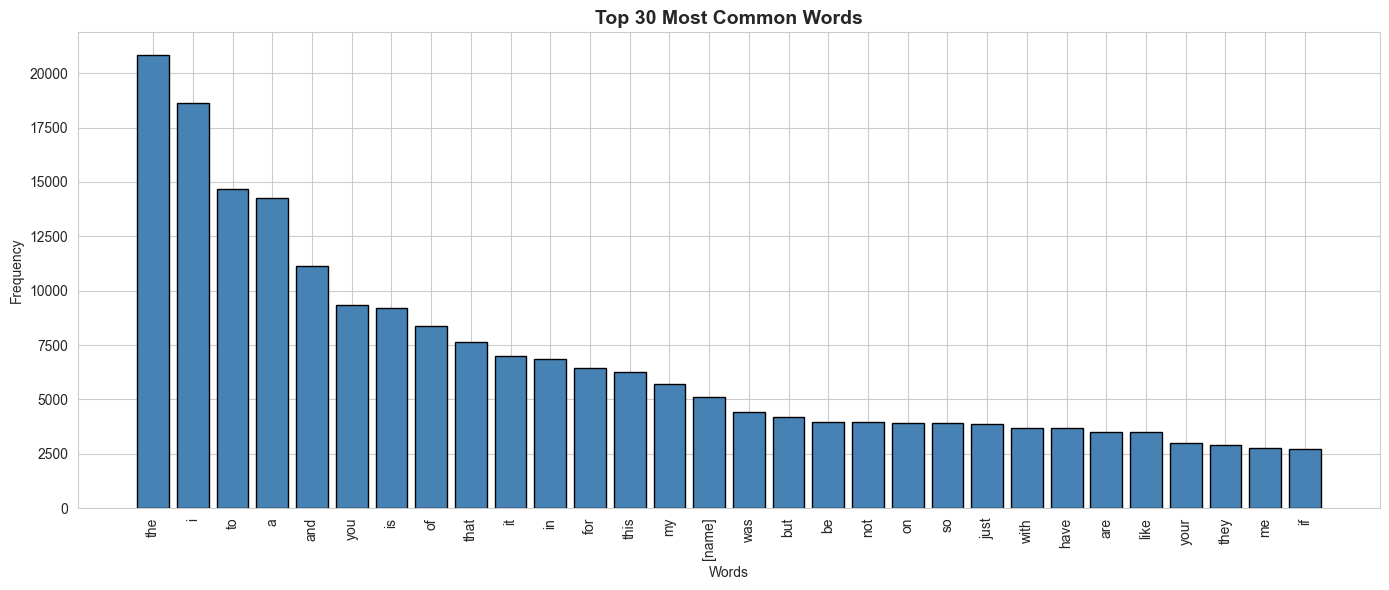


Total unique words: 63999
Total words: 663639


In [11]:
from collections import Counter

# Get all words
all_words = ' '.join(df_train['text'].values).lower().split()
word_freq = Counter(all_words)
most_common = word_freq.most_common(30)

print("Top 30 Most Common Words:")
for word, count in most_common:
    print(f"  {word}: {count}")

# Visualize top words
words, counts = zip(*most_common)
plt.figure(figsize=(14, 6))
plt.bar(words, counts, color='steelblue', edgecolor='black')
plt.title('Top 30 Most Common Words', fontsize=14, fontweight='bold')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(f"\nTotal unique words: {len(word_freq)}")
print(f"Total words: {sum(word_freq.values())}")

Sentiment Word Counts by Emotion:
          pos_word_count  neg_word_count  sentiment_diff
emotion                                                 
anger              0.052           0.090          -0.039
disgust            0.044           0.188          -0.144
fear               0.044           0.129          -0.085
joy                0.266           0.027           0.239
sadness            0.053           0.138          -0.085
surprise           0.050           0.032           0.018


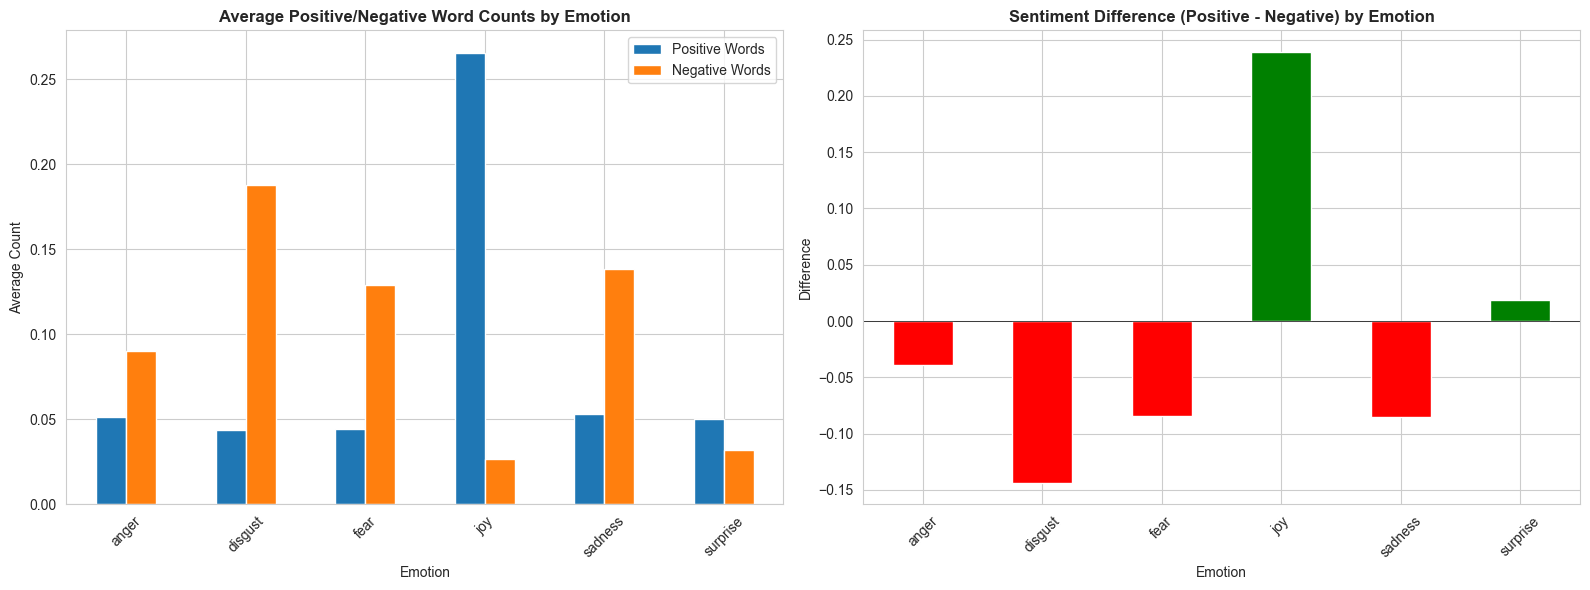


Sentiment Insights:
  - anger: More negative words (diff: -0.04)
  - disgust: More negative words (diff: -0.14)
  - fear: More negative words (diff: -0.08)
  - joy: More positive words (diff: +0.24)
  - sadness: More negative words (diff: -0.09)
  - surprise: More positive words (diff: +0.02)


In [12]:
# Simple sentiment analysis using positive/negative word lists
# This is a basic approach - for production, consider using TextBlob or VADER

positive_words = {'happy', 'joy', 'love', 'good', 'great', 'wonderful', 'excellent', 
                  'amazing', 'awesome', 'fantastic', 'beautiful', 'best', 'glad', 
                  'excited', 'smile', 'laugh', 'fun', 'enjoy', 'perfect', 'yay'}

negative_words = {'sad', 'angry', 'hate', 'bad', 'terrible', 'awful', 'horrible', 
                  'worst', 'fear', 'scared', 'disgusting', 'angry', 'mad', 'upset', 
                  'disappointed', 'crying', 'pain', 'hurt', 'nightmare', 'terrified'}

def count_sentiment_words(text):
    words = text.lower().split()
    pos_count = sum(1 for w in words if w in positive_words)
    neg_count = sum(1 for w in words if w in negative_words)
    return pos_count, neg_count

df_train['pos_word_count'] = df_train['text'].apply(lambda x: count_sentiment_words(x)[0])
df_train['neg_word_count'] = df_train['text'].apply(lambda x: count_sentiment_words(x)[1])
df_train['sentiment_diff'] = df_train['pos_word_count'] - df_train['neg_word_count']

# Analyze sentiment by emotion
print("Sentiment Word Counts by Emotion:")
sentiment_stats = df_train.groupby('emotion')[['pos_word_count', 'neg_word_count', 'sentiment_diff']].mean()
print(sentiment_stats.round(3))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Positive vs Negative word counts
sentiment_stats[['pos_word_count', 'neg_word_count']].plot(kind='bar', ax=axes[0])
axes[0].set_title('Average Positive/Negative Word Counts by Emotion', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Emotion')
axes[0].set_ylabel('Average Count')
axes[0].legend(['Positive Words', 'Negative Words'])
axes[0].tick_params(axis='x', rotation=45)

# Sentiment difference
sentiment_stats['sentiment_diff'].plot(kind='bar', ax=axes[1], color=['green' if x > 0 else 'red' for x in sentiment_stats['sentiment_diff']])
axes[1].set_title('Sentiment Difference (Positive - Negative) by Emotion', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Emotion')
axes[1].set_ylabel('Difference')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nSentiment Insights:")
for emotion in sentiment_stats.index:
    diff = sentiment_stats.loc[emotion, 'sentiment_diff']
    if diff > 0:
        print(f"  - {emotion}: More positive words (diff: +{diff:.2f})")
    else:
        print(f"  - {emotion}: More negative words (diff: {diff:.2f})")

## 13. Feature Correlation Analysis

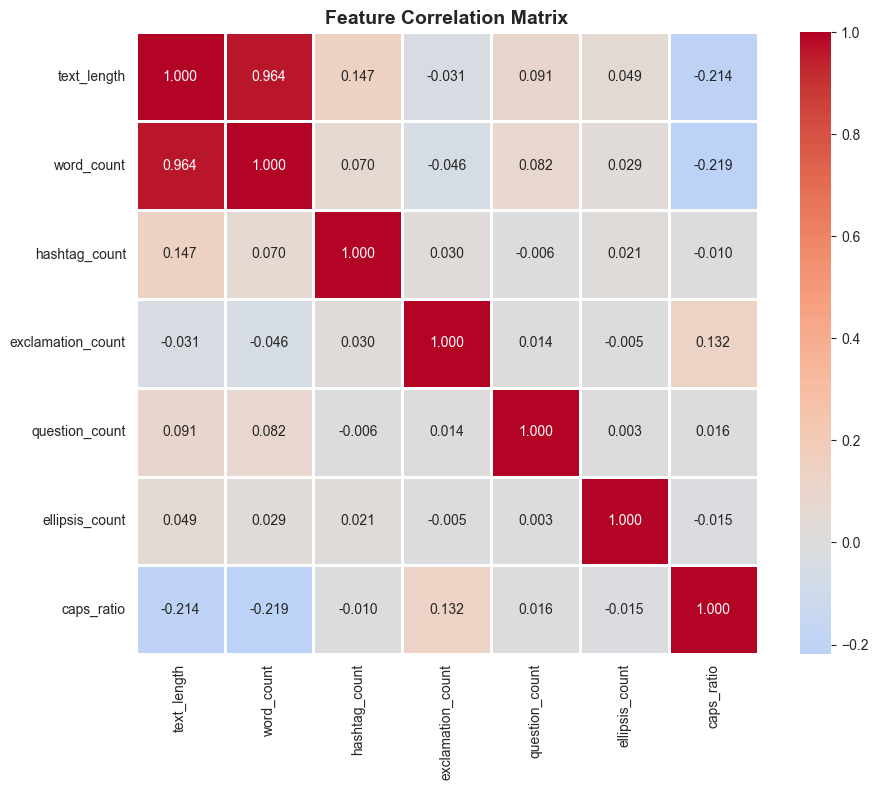


Correlation Insights:
  - Highest correlation: 1.000
    Between: ('word_count', 'text_length')

Feature Statistics by Emotion:

          text_length  word_count  hashtag_count  exclamation_count  \
emotion                                                               
anger          85.867      15.326          0.190              0.173   
disgust        79.010      14.082          0.293              0.107   
fear           80.706      14.963          0.304              0.109   
joy            70.658      13.155          0.111              0.277   
sadness        75.494      14.074          0.067              0.109   
surprise       71.890      13.488          0.004              0.141   

          question_count  ellipsis_count  caps_ratio  
emotion                                               
anger              0.148           0.061       0.054  
disgust            0.095           0.067       0.047  
fear               0.072           0.079       0.039  
joy                0.054  

In [14]:
# Create punctuation features if not already present
if 'exclamation_count' not in df_train.columns:
    df_train['exclamation_count'] = df_train['text'].str.count('!')
    df_train['question_count'] = df_train['text'].str.count(r'\?')
    df_train['ellipsis_count'] = df_train['text'].str.count(r'\.\.\.')
    df_train['caps_ratio'] = df_train['text'].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x) if len(x) > 0 else 0)

# Analyze correlation between features and create correlation matrix
feature_cols = ['text_length', 'word_count', 'hashtag_count', 
                'exclamation_count', 'question_count', 'ellipsis_count', 
                'caps_ratio']

# Calculate correlation matrix
corr_matrix = df_train[feature_cols].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelation Insights:")
print(f"  - Highest correlation: {corr_matrix.abs().unstack().sort_values(ascending=False)[1]:.3f}")
highly_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
highly_corr = highly_corr[highly_corr < 1.0]
if len(highly_corr) > 0:
    print(f"    Between: {highly_corr.index[0]}")

# Feature importance for each emotion (using simple statistics)
print("\nFeature Statistics by Emotion:\n")
feature_stats = df_train.groupby('emotion')[feature_cols].mean()
print(feature_stats.round(3))

## 14. Class Imbalance Analysis

CLASS IMBALANCE ANALYSIS

Imbalance Ratios (compared to majority class 'joy'):

  joy         : 23797 samples | 49.69% | Ratio: 1:1.00
  anger       : 10694 samples | 22.33% | Ratio: 1:2.23
  surprise    :  6281 samples | 13.12% | Ratio: 1:3.79
  sadness     :  3926 samples |  8.20% | Ratio: 1:6.06
  fear        :  2009 samples |  4.20% | Ratio: 1:11.85
  disgust     :  1183 samples |  2.47% | Ratio: 1:20.12

Recommended Class Weights (for sklearn models):

  anger       : 0.746
  disgust     : 6.747
  fear        : 3.973
  joy         : 0.335
  sadness     : 2.033
  surprise    : 1.271

Recommended Class Weights (for sklearn models):

  anger       : 0.746
  disgust     : 6.747
  fear        : 3.973
  joy         : 0.335
  sadness     : 2.033
  surprise    : 1.271


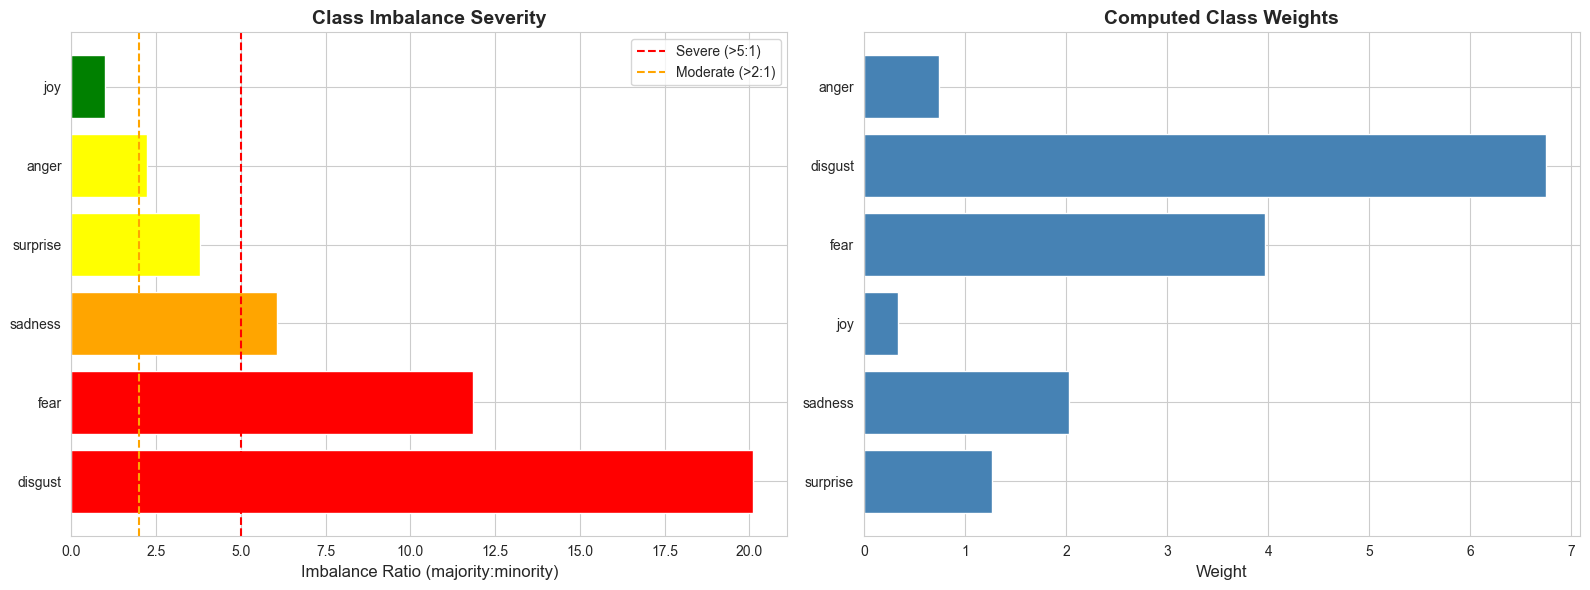


CRITICAL INSIGHTS:
  - Disgust is 20.1x UNDERREPRESENTED compared to joy
  - Fear is 11.8x UNDERREPRESENTED compared to joy
  - Without handling imbalance, model will likely predict mostly 'joy' and 'anger'
  - Mean F1 Score requires good performance on ALL classes, especially minority ones

RECOMMENDED STRATEGIES:
  1. Use SMOTE or ADASYN to oversample minority classes
  2. Apply class_weight='balanced' in sklearn models
  3. Use Focal Loss in deep learning models
  4. Monitor per-class F1 scores during validation
  5. Consider ensemble with different sampling strategies


In [15]:
# Detailed class imbalance analysis
from sklearn.utils.class_weight import compute_class_weight

emotion_counts = df_train['emotion'].value_counts()

print("="*50)
print("CLASS IMBALANCE ANALYSIS")
print("="*50)

# Calculate imbalance ratios
print("\nImbalance Ratios (compared to majority class 'joy'):\n")
max_count = emotion_counts.max()
for emotion, count in emotion_counts.items():
    ratio = max_count / count
    print(f"  {emotion:12s}: {count:5d} samples | {count/len(df_train)*100:5.2f}% | Ratio: 1:{ratio:.2f}")

# Calculate class weights
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(df_train['emotion']),
    y=df_train['emotion']
)

print("\nRecommended Class Weights (for sklearn models):\n")
for emotion, weight in zip(np.unique(df_train['emotion']), class_weights):
    print(f"  {emotion:12s}: {weight:.3f}")

# Visualize imbalance severity
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Imbalance ratios
ratios = [max_count / count for count in emotion_counts.values]
colors_severity = ['green' if r < 2 else 'yellow' if r < 5 else 'orange' if r < 10 else 'red' for r in ratios]
axes[0].barh(emotion_counts.index, ratios, color=colors_severity)
axes[0].set_xlabel('Imbalance Ratio (majority:minority)', fontsize=12)
axes[0].set_title('Class Imbalance Severity', fontsize=14, fontweight='bold')
axes[0].axvline(x=5, color='red', linestyle='--', label='Severe (>5:1)')
axes[0].axvline(x=2, color='orange', linestyle='--', label='Moderate (>2:1)')
axes[0].legend()
axes[0].invert_yaxis()

# Class weights
axes[1].barh(np.unique(df_train['emotion']), class_weights, color='steelblue')
axes[1].set_xlabel('Weight', fontsize=12)
axes[1].set_title('Computed Class Weights', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\nCRITICAL INSIGHTS:")
print(f"  - Disgust is {max_count/emotion_counts['disgust']:.1f}x UNDERREPRESENTED compared to joy")
print(f"  - Fear is {max_count/emotion_counts['fear']:.1f}x UNDERREPRESENTED compared to joy")
print(f"  - Without handling imbalance, model will likely predict mostly 'joy' and 'anger'")
print(f"  - Mean F1 Score requires good performance on ALL classes, especially minority ones")
print(f"\nRECOMMENDED STRATEGIES:")
print(f"  1. Use SMOTE or ADASYN to oversample minority classes")
print(f"  2. Apply class_weight='balanced' in sklearn models")
print(f"  3. Use Focal Loss in deep learning models")
print(f"  4. Monitor per-class F1 scores during validation")
print(f"  5. Consider ensemble with different sampling strategies")

## 15. Punctuation Patterns by Emotion

Average Punctuation Usage by Emotion:
          exclamation_count  question_count  ellipsis_count  caps_ratio  \
emotion                                                                   
anger                 0.173           0.148           0.061       0.054   
disgust               0.107           0.095           0.067       0.047   
fear                  0.109           0.072           0.079       0.039   
joy                   0.277           0.054           0.059       0.056   
sadness               0.109           0.054           0.070       0.048   
surprise              0.141           0.473           0.071       0.054   

          quote_count  
emotion                
anger           0.051  
disgust         0.036  
fear            0.028  
joy             0.042  
sadness         0.050  
surprise        0.060  


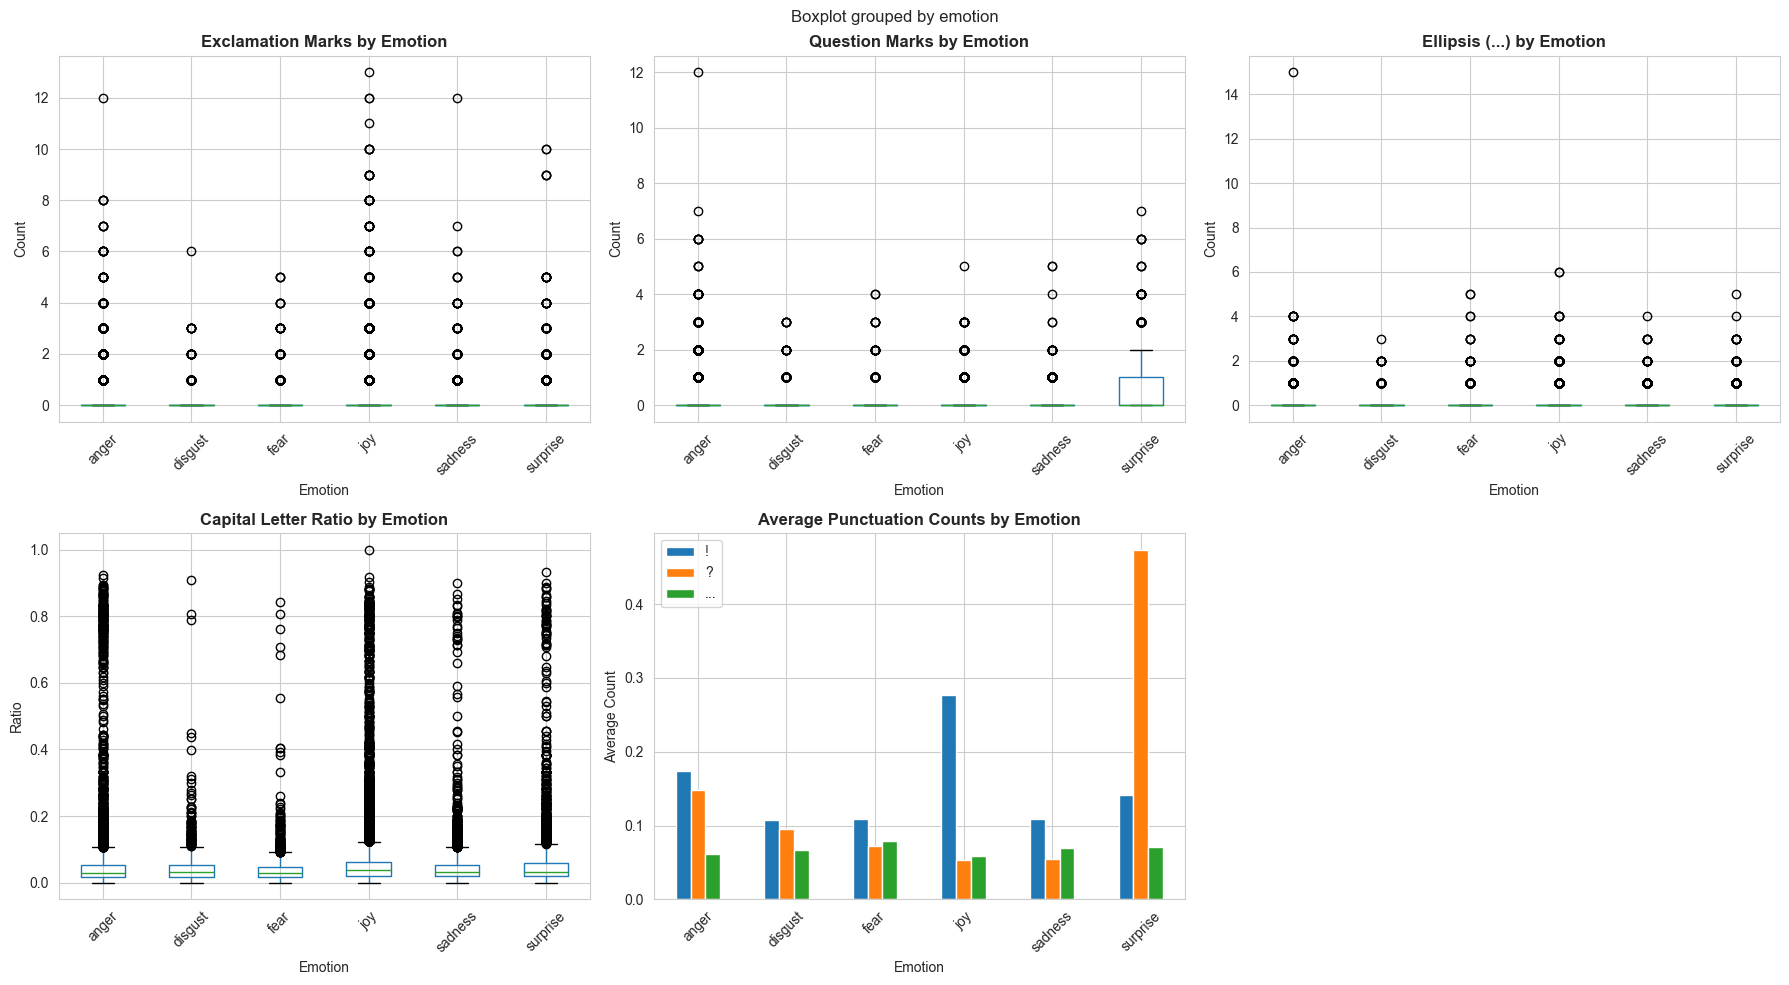


Key Findings:
  - Emotions with most exclamations: joy
  - Emotions with most questions: surprise
  - Emotions with most ellipsis: fear
  - Emotions with highest caps ratio: joy


In [16]:
# Analyze punctuation usage by emotion
df_train['exclamation_count'] = df_train['text'].str.count('!')
df_train['question_count'] = df_train['text'].str.count(r'\?')
df_train['ellipsis_count'] = df_train['text'].str.count(r'\.\.\.')
df_train['caps_ratio'] = df_train['text'].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x) if len(x) > 0 else 0)
df_train['quote_count'] = df_train['text'].str.count('"')

# Calculate average punctuation by emotion
punct_stats = df_train.groupby('emotion').agg({
    'exclamation_count': 'mean',
    'question_count': 'mean',
    'ellipsis_count': 'mean',
    'caps_ratio': 'mean',
    'quote_count': 'mean'
}).round(3)

print("Average Punctuation Usage by Emotion:")
print(punct_stats)

# Visualize punctuation patterns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Exclamation marks
df_train.boxplot(column='exclamation_count', by='emotion', ax=axes[0, 0])
axes[0, 0].set_title('Exclamation Marks by Emotion', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Emotion')
axes[0, 0].set_ylabel('Count')
plt.sca(axes[0, 0])
plt.xticks(rotation=45)

# Question marks
df_train.boxplot(column='question_count', by='emotion', ax=axes[0, 1])
axes[0, 1].set_title('Question Marks by Emotion', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Emotion')
axes[0, 1].set_ylabel('Count')
plt.sca(axes[0, 1])
plt.xticks(rotation=45)

# Ellipsis
df_train.boxplot(column='ellipsis_count', by='emotion', ax=axes[0, 2])
axes[0, 2].set_title('Ellipsis (...) by Emotion', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Emotion')
axes[0, 2].set_ylabel('Count')
plt.sca(axes[0, 2])
plt.xticks(rotation=45)

# Capital letter ratio
df_train.boxplot(column='caps_ratio', by='emotion', ax=axes[1, 0])
axes[1, 0].set_title('Capital Letter Ratio by Emotion', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Emotion')
axes[1, 0].set_ylabel('Ratio')
plt.sca(axes[1, 0])
plt.xticks(rotation=45)

# Average punctuation comparison
punct_means = df_train.groupby('emotion')[['exclamation_count', 'question_count', 'ellipsis_count']].mean()
punct_means.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Average Punctuation Counts by Emotion', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Emotion')
axes[1, 1].set_ylabel('Average Count')
axes[1, 1].legend(['!', '?', '...'])
plt.sca(axes[1, 1])
plt.xticks(rotation=45)

# Hide the last subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("\nKey Findings:")
print(f"  - Emotions with most exclamations: {punct_stats['exclamation_count'].idxmax()}")
print(f"  - Emotions with most questions: {punct_stats['question_count'].idxmax()}")
print(f"  - Emotions with most ellipsis: {punct_stats['ellipsis_count'].idxmax()}")
print(f"  - Emotions with highest caps ratio: {punct_stats['caps_ratio'].idxmax()}")

## 16. Emotion-Specific Vocabulary

In [17]:
# Analyze most common words for each emotion
from collections import Counter

print("Top 15 Words by Emotion (excluding common stop words):\n")
print("="*50)

# Common stop words to exclude
stop_words = {'the', 'i', 'to', 'a', 'and', 'you', 'is', 'of', 'that', 'it', 
              'in', 'for', 'this', 'my', 'was', 'but', 'be', 'not', 'on', 
              'so', 'just', 'with', 'have', 'are', 'like', 'your', 'they', 
              'me', 'if', 'at', 'what', 'we', 'all', 'do', 'he', 'can', 
              'she', 'when', 'no', 'or', 'as', 'from', 'her', 'him', 'an', 
              'will', 'would', 'there', 'their', 'been', 'has', 'had', 'by',
              '[name]'}

for emotion in df_train['emotion'].unique():
    emotion_texts = df_train[df_train['emotion'] == emotion]['text'].values
    words = ' '.join(emotion_texts).lower().split()
    
    # Filter out stop words
    filtered_words = [w for w in words if w not in stop_words and len(w) > 2]
    word_freq = Counter(filtered_words)
    
    print(f"\n{emotion.upper()} ({len(emotion_texts)} samples):")
    print("-"*50)
    top_words = word_freq.most_common(15)
    for word, count in top_words:
        print(f"  {word}: {count}")

# Calculate unique words per emotion
print("\n" + "="*50)
print("Vocabulary Diversity by Emotion:\n")
for emotion in df_train['emotion'].unique():
    emotion_texts = df_train[df_train['emotion'] == emotion]['text'].values
    words = ' '.join(emotion_texts).lower().split()
    unique_words = len(set(words))
    total_words = len(words)
    print(f"{emotion:12s}: {unique_words:,} unique words from {total_words:,} total ({unique_words/total_words*100:.2f}% unique)")

Top 15 Words by Emotion (excluding common stop words):


JOY (23797 samples):
--------------------------------------------------
  love: 1654
  good: 1295
  i'm: 1098
  it's: 1071
  get: 971
  thank: 943
  about: 879
  one: 876
  thanks: 801
  really: 801
  lol: 730
  out: 716
  more: 713
  hope: 677
  how: 676

FEAR (2009 samples):
--------------------------------------------------
  i'm: 172
  out: 113
  about: 112
  get: 104
  it's: 81
  still: 78
  one: 71
  going: 69
  scared: 67
  don't: 67
  afraid: 62
  into: 61
  down: 60
  back: 60
  got: 57

ANGER (10694 samples):
--------------------------------------------------
  people: 635
  don't: 589
  get: 535
  about: 530
  it's: 508
  even: 446
  how: 415
  i'm: 404
  one: 392
  out: 382
  because: 366
  his: 356
  think: 356
  why: 355
  who: 334

SURPRISE (6281 samples):
--------------------------------------------------
  how: 524
  why: 382
  about: 347
  know: 335
  i'm: 293
  think: 283
  it's: 253
  did: 247
  get: 246
  don

## Summary - Key Findings

In [18]:
print("="*50)
print("EDA SUMMARY - COMPREHENSIVE DATASET ANALYSIS")
print("="*50)

print(f"\nDATASET OVERVIEW:")
print(f"   Total posts: {len(df):,}")
print(f"   Training set: {len(df_train):,} ({len(df_train)/len(df)*100:.1f}%)")
print(f"   Test set: {len(df_test):,} ({len(df_test)/len(df)*100:.1f}%)")

print(f"\nEMOTION DISTRIBUTION (Training Set):")
for emotion in emotion_counts.index:
    count = emotion_counts[emotion]
    percentage = count / len(df_train) * 100
    print(f"   {emotion:12s}: {count:,} ({percentage:.1f}%)")

print(f"\nCLASS IMBALANCE:")
print(f"   Imbalance ratio (max/min): {emotion_counts.max() / emotion_counts.min():.1f}:1")
print(f"   Most common: {emotion_counts.idxmax()} ({emotion_counts.max():,} samples)")
print(f"   Least common: {emotion_counts.idxmin()} ({emotion_counts.min():,} samples)")

print(f"\nTEXT CHARACTERISTICS:")
print(f"   Average text length: {df_train['text_length'].mean():.1f} characters")
print(f"   Average word count: {df_train['word_count'].mean():.1f} words")
print(f"   Longest text by emotion: {df_train.groupby('emotion')['text_length'].mean().idxmax()} ({df_train.groupby('emotion')['text_length'].mean().max():.1f} chars)")
print(f"   Shortest text by emotion: {df_train.groupby('emotion')['text_length'].mean().idxmin()} ({df_train.groupby('emotion')['text_length'].mean().min():.1f} chars)")

print(f"\nHASHTAG USAGE:")
print(f"   Posts with hashtags: {df_train['has_hashtag'].sum():,} ({df_train['has_hashtag'].sum()/len(df_train)*100:.1f}%)")
print(f"   Total unique hashtags: {len(hashtag_counter)}")
print(f"   Most common hashtag: #{list(hashtag_counter.keys())[0]} ({list(hashtag_counter.values())[0]} occurrences)")

print(f"\nVOCABULARY:")
print(f"   Total unique words: {len(word_freq):,}")
print(f"   Total words: {sum(word_freq.values()):,}")
print(f"   Average vocabulary richness: {len(word_freq)/sum(word_freq.values())*100:.2f}%")

print(f"\nPUNCTUATION PATTERNS:")
print(f"   Most exclamations (!): {punct_stats['exclamation_count'].idxmax()} ({punct_stats['exclamation_count'].max():.3f} avg)")
print(f"   Most questions (?): {punct_stats['question_count'].idxmax()} ({punct_stats['question_count'].max():.3f} avg)")
print(f"   Most ellipsis (...): {punct_stats['ellipsis_count'].idxmax()} ({punct_stats['ellipsis_count'].max():.3f} avg)")

print(f"\nSENTIMENT INDICATORS:")
print(f"   Most positive emotion: {sentiment_stats['sentiment_diff'].idxmax()} (diff: +{sentiment_stats['sentiment_diff'].max():.2f})")
print(f"   Most negative emotion: {sentiment_stats['sentiment_diff'].idxmin()} (diff: {sentiment_stats['sentiment_diff'].min():.2f})")

print(f"\nKEY INSIGHTS FOR MODELING:")
print(f"   1. Severe class imbalance needs to be addressed (SMOTE, class weights, Focal Loss)")
print(f"   2. Text length varies by emotion - useful feature")
print(f"   3. Punctuation patterns are emotion-specific indicators")
print(f"   4. Hashtags are informative but sparse (5.2%)")
print(f"   5. Clear sentiment differences between emotions")
print(f"   6. Rich vocabulary diversity ({len(word_freq):,} unique words)")

print("\n" + "="*50)
print("EDA COMPLETE - Ready for Feature Engineering & Modeling")
print("="*50)

EDA SUMMARY - COMPREHENSIVE DATASET ANALYSIS

DATASET OVERVIEW:
   Total posts: 64,171
   Training set: 47,890 (74.6%)
   Test set: 16,281 (25.4%)

EMOTION DISTRIBUTION (Training Set):
   joy         : 23,797 (49.7%)
   anger       : 10,694 (22.3%)
   surprise    : 6,281 (13.1%)
   sadness     : 3,926 (8.2%)
   fear        : 2,009 (4.2%)
   disgust     : 1,183 (2.5%)

CLASS IMBALANCE:
   Imbalance ratio (max/min): 20.1:1
   Most common: joy (23,797 samples)
   Least common: disgust (1,183 samples)

TEXT CHARACTERISTICS:
   Average text length: 75.2 characters
   Average word count: 13.9 words
   Longest text by emotion: anger (85.9 chars)
   Shortest text by emotion: joy (70.7 chars)

HASHTAG USAGE:
   Posts with hashtags: 2,508 (5.2%)
   Total unique hashtags: 2801
   Most common hashtag: #badd (1 occurrences)

VOCABULARY:
   Total unique words: 5,109
   Total words: 10,338
   Average vocabulary richness: 49.42%

PUNCTUATION PATTERNS:
   Most exclamations (!): joy (0.277 avg)
   Most 